# >> library 가져오기

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
import time
import random

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import seaborn as sns
sns.set()

In [6]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [7]:
from sklearn.model_selection import KFold, StratifiedKFold

# >> 데이터 불러오기

In [8]:
train = pd.read_csv("../data/dacon_galaxy/train.csv", index_col=0)
test = pd.read_csv('../data/dacon_galaxy/test.csv', index_col=0)
sample_submission = pd.read_csv('../data/dacon_galaxy/sample_submission.csv', index_col=0)

## type 타입 변환 (string obj >> integer)

In [9]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [10]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10


## 결측치 확인

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 23 columns):
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
type_num      199991 non-null int64
dtypes: float64(20),

# >> Outlier 제거

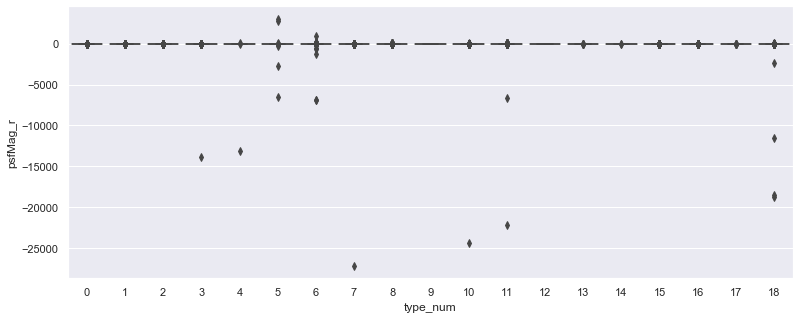

In [14]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (13,5)

sns.boxplot('type_num', 'psfMag_r', data=train)

In [15]:
for column in train.columns[2:-1]:
    train = train.drop(index=train[(train[column] < -50) | (train[column] > 300)].index)

train = train.reset_index(drop=True)

### Outlier 제거 후

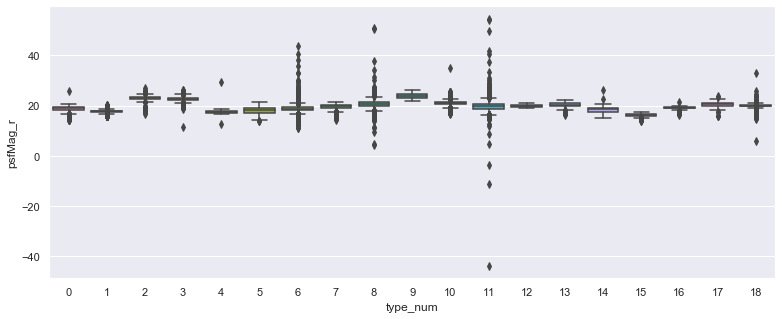

In [16]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (13,5)

sns.boxplot('type_num', 'psfMag_r', data=train)

# 각 Type의 데이터 개수 분포 확인

In [17]:
value_dist = train['type'].value_counts()

In [18]:
value_dist

QSO                    49666
GALAXY                 37307
SERENDIPITY_BLUE       21754
SPECTROPHOTO_STD       14629
REDDEN_STD             14615
STAR_RED_DWARF         13749
STAR_BHB               13494
SERENDIPITY_FIRST       7129
ROSAT_D                 6557
STAR_CATY_VAR           6505
SERENDIPITY_DISTANT     4653
STAR_CARBON             3256
SERENDIPITY_RED         2560
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

<BarContainer object of 19 artists>

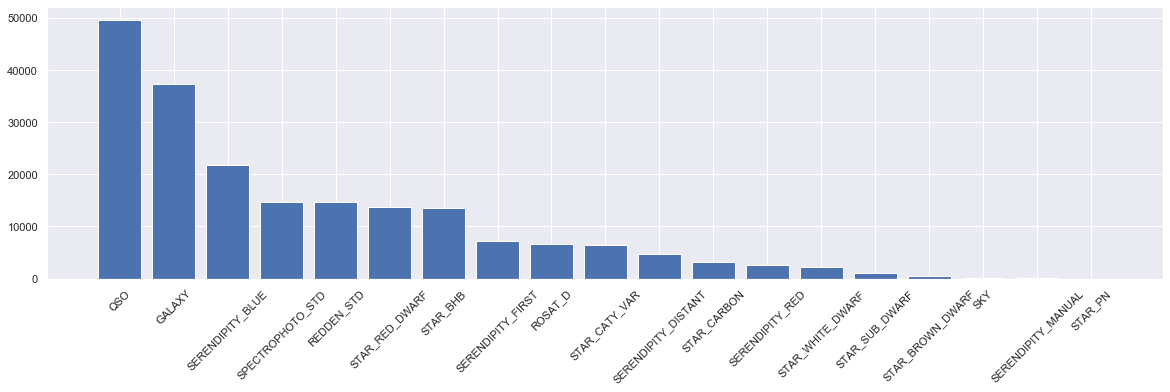

In [20]:
# 위의 type별 value_counts 도식화 표현
fig = plt.figure(figsize=(20, 5))
ax = plt.subplot(1, 1, 1)

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

ax.bar(value_dist.index, value_dist.values)

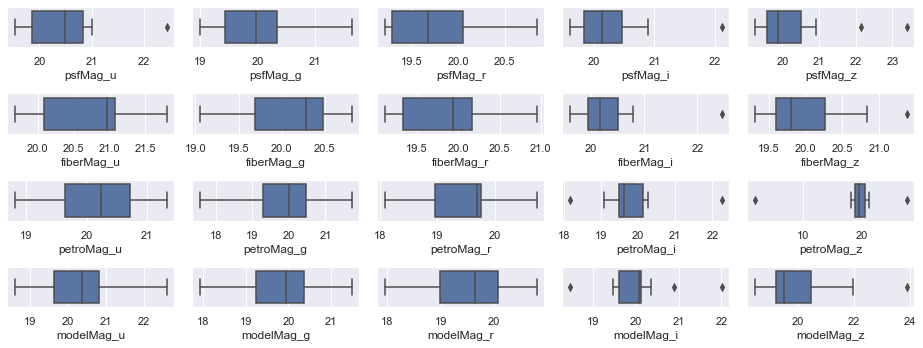

In [19]:
# 데이터 개수가 아주 적은 category의 칼럼별 수치 분포도 boxplot() 도식화
# 이 분포를 기준으로 random 난수 생성해서 데이터를 부풀려야할지는 나중에 정해야 함
fig, ax = plt.subplots(4,5)
idx_row = 0
for idx, column in enumerate(train.columns[2:-1]):
    sns.boxplot(train[train['type'] == 'STAR_PN'][column], ax=ax[idx_row,idx%5])
    if idx%5 == 4:
        idx_row += 1
    
fig.tight_layout()

## 데이터가 가장 많은 QSO를 기준으로 49000여개로 데이터를 맞추기 위한 함수
## 생략

In [72]:
# def equalTypeNumber(df):
#     dist_value = df['type'].value_counts()
#     type_list = dist_value.index
#     for idx, typeName in enumerate(type_list):
#         if idx == 0:
#             continue
        
#         # value_counts()의 결과를 토대로 데이터 개수가 가장 큰 QSO를 기준으로 한다.
#         # 나머지 type에 대해 
#         count = dist_value.values[0] % dist_value.values[idx]
#         random_idx = random.sample(list(np.arange(0,len(df[df['type'] == typeName]),1)), count)
#         sample_train = df.iloc[df[df['type'] == typeName].index[random_idx]]
        
#         duplicate = int(dist_value.values[0] / dist_value.values[idx])
#         temp = df[df['type'] == typeName]
        
#         for i in range(duplicate - 1):
#             tmp_idx1 = {original_idx : (new_idx + len(df)) for new_idx, original_idx in enumerate(temp.index)}
#             temp.rename(index=tmp_idx1, inplace=True)
#             df = df.append(temp)
        
#         tmp_idx2 = {original_idx : (new_idx + len(df)) for new_idx, original_idx in enumerate(sample_train.index)}
#         sample_train.rename(index=tmp_idx2, inplace=True)
#         df = df.append(sample_train)
        
#     return df

In [73]:
# train = equalTypeNumber(train)
# train

### 데이터 개수 동일화 결과 보기 - 생략

In [13]:
# value_dist = train['type'].value_counts()

In [21]:
# value_dist

In [22]:
# 동일화 한 이후로 그래프 표현

# fig = plt.figure(figsize=(20, 5))
# ax = plt.subplot(1, 1, 1)

# for label in ax.xaxis.get_ticklabels() :
#     label.set_rotation(45)

# ax.bar(value_dist.index, value_dist.values)

# Test Set 확인

In [23]:
test.head()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,...,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,...,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,...,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,...,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,...,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368


## Test set 결측치 확인

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10009 entries, 199991 to 209999
Data columns (total 21 columns):
fiberID       10009 non-null int64
psfMag_u      10009 non-null float64
psfMag_g      10009 non-null float64
psfMag_r      10009 non-null float64
psfMag_i      10009 non-null float64
psfMag_z      10009 non-null float64
fiberMag_u    10009 non-null float64
fiberMag_g    10009 non-null float64
fiberMag_r    10009 non-null float64
fiberMag_i    10009 non-null float64
fiberMag_z    10009 non-null float64
petroMag_u    10009 non-null float64
petroMag_g    10009 non-null float64
petroMag_r    10009 non-null float64
petroMag_i    10009 non-null float64
petroMag_z    10009 non-null float64
modelMag_u    10009 non-null float64
modelMag_g    10009 non-null float64
modelMag_r    10009 non-null float64
modelMag_i    10009 non-null float64
modelMag_z    10009 non-null float64
dtypes: float64(20), int64(1)
memory usage: 1.7 MB


## Test Set boxplot 그래프로 데이터 분포 확인

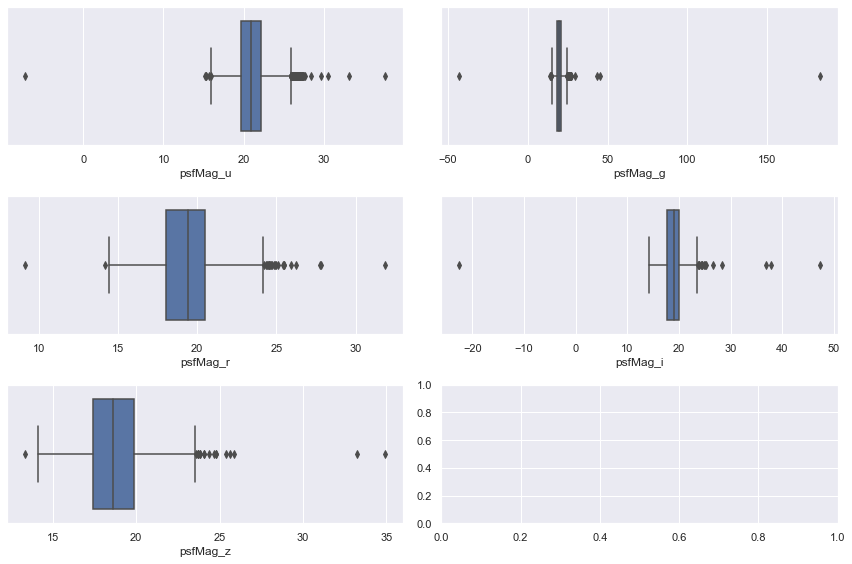

In [79]:
# 함수로 칼럼별 그래프 그리는 코드 구성하기

fig, ax = plt.subplots(3,2, figsize=(12,8))
sns.boxplot(test['psfMag_u'], ax=ax[0,0])
sns.boxplot(test['psfMag_g'], ax=ax[0,1])
sns.boxplot(test['psfMag_r'], ax=ax[1,0])
sns.boxplot(test['psfMag_i'], ax=ax[1,1])
sns.boxplot(test['psfMag_z'], ax=ax[2,0])
fig.tight_layout()

# >> Model 돌리기 전 준비

In [25]:
# train set 정답지, 문제지 / test set 설정
train_X = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test

In [26]:
train_X.shape

(199889, 21)

### Validation을 위한 train set split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_X, 
                                                    train_y, 
                                                    stratify = train_y,
                                                    test_size=0.2, 
                                                    random_state=1234)

### stratifiedKFold or KFold 사용 (데이터 정답지의 개수 분포를 보고 결정)

In [27]:
# kfold = KFold(n_splits=6, random_state= 0, shuffle = True)
kfold_s = StratifiedKFold(n_splits=6, random_state= 0, shuffle = True)

# >> Model 돌리기

### 모델 관련 library import

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [112]:
# K-Nearest Neighbors Model
# knn = KNeighborsClassifier(n_neighbors=20, weights='distance', n_jobs=-1)

In [141]:
# Random Forest Model
# RF_cif = RandomForestClassifier(n_estimators=500, max_features=6, random_state=1234)

In [ ]:
# LGB = LGBMClassifier(random_state =1234, n_jobs = -1)

In [ ]:
# XGboost Model
XGBC = XGBClassifier(n_jobs=-1, random_state=1234)

In [186]:
# XGBoost parameter tuning

xgc_param_grid = {
    'n_estimators' : [200],
    'learning_rate' :[0.15],
    #'eta': np.arange(0,0.3,0.1),
    #'min_child_weight' : np.arange(4,7,1),
    'max_depth' : np.arange(3,10,1)             
}

In [ ]:
# LGBM parameter tuning

# lb_param_grid = {
#     'learning_rate' : [0.1],
#     'num_iterations' : [200],
#     'max_bin' : [300],
#     'num_leaves':[256]
# #     'num_boost_round' : [1000]
# }

- Randomized Search

In [ ]:
n_iter_search = 10
xgv = RandomizedSearchCV(XGBC, 
                         xgc_param_grid, 
                             cv=kfold_s,
                             n_jobs=-1,
                             random_state=1234,
                             scoring='neg_log_loss')
                            #n_iter=n_iter_search)
xgv.fit(X_train, y_train)

In [ ]:
# LGB = LGBMClassifier(learning_rate=0.1, 
#                      num_iterations =200, 
#                      max_bin=300, 
#                      num_leaves =256, 
#                      boosting='dart',
#                      random_state=1234, 
#                      n_jobs = -1)


### Cross Validation

In [ ]:
log_loss = cross_val_score(RF_cif, X_train, y_train, cv=kfold_s, scoring='neg_log_loss')

# >> Validation을 통해 모델 성능 확인

In [26]:
# Test with Test Set
y_pred = catb_best.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.9094001700935515

In [32]:
y_pred

30667      5
103239    15
50562      4
129161     6
159805     5
          ..
195079    18
165249     8
183755    11
163341    11
196364     8
Name: type_num, Length: 39978, dtype: int64

- CatBoost 사용시 list로 변환해주어야 한다.

In [48]:
# catboost predict 결과가 이중 numpy.array형태로 되어있어서 
# 벗겨서 list로 만드는 작업
y_pred_list = []
for i in y_pred:
    y_pred_list.append(int(i))

- CatBoost 이외의 알고리즘은 변환해줄 필요 없다.

In [49]:
category = {}
for i, column in enumerate(sample_submission.columns):
    category[i] = column

In [50]:
for cate in range(19):
    print("category",cate,"\t"+ category[cate],':', sum(((y_test == cate) & (y_test == y_pred_list))) / sum(y_test == cate))

category 0 	STAR_WHITE_DWARF : 0.6412037037037037
category 1 	STAR_CATY_VAR : 0.9707916986933128
category 2 	STAR_BROWN_DWARF : 0.87
category 3 	SERENDIPITY_RED : 0.943359375
category 4 	REDDEN_STD : 0.9787889154977762
category 5 	STAR_BHB : 0.8995924416450537
category 6 	GALAXY : 0.9882053344055757
category 7 	SERENDIPITY_DISTANT : 0.7089151450053706
category 8 	QSO : 0.9085875364945133
category 9 	SKY : 0.96
category 10 	STAR_RED_DWARF : 0.990909090909091
category 11 	ROSAT_D : 0.38291380625476734
category 12 	STAR_PN : 0.6666666666666666
category 13 	SERENDIPITY_FIRST : 0.6669004207573632
category 14 	STAR_CARBON : 0.9846390168970814
category 15 	SPECTROPHOTO_STD : 0.9736842105263158
category 16 	STAR_SUB_DWARF : 0.9437229437229437
category 17 	SERENDIPITY_MANUAL : 0.75
category 18 	SERENDIPITY_BLUE : 0.9142725810158584


In [166]:
xgv.best_estimator_

LGBMClassifier(boosting='dart', boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_bin=300, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_iterations=200, num_leaves=256, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [167]:
xgv.best_score_

-0.16495541622762006

# >> 제출

In [22]:
XGV_best = xgv.best_estimator_
y_pred = XGV_best.predict_proba(test_x)

In [23]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submission_xgb.csv', index=True)

# >> 모델 저장

In [ ]:
from joblib import dump, load

In [ ]:
dump()